In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt
import joblib

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
fishers_dict = od()

In [19]:
fisher3x2pt_wIA  = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher3x2pt.cmp')
fisher3x2pt_woIA = joblib.load('FisherMats/quadruple_source_ClY1/fisher3x2pt.cmp')

In [20]:
corner = hsc3x2pt.corner_class()

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt IA (Y1, 4bin)",0.11698,0.06558,0.13992
"3x2pt (Y1, 4bin)",0.09334,0.06497,0.11530


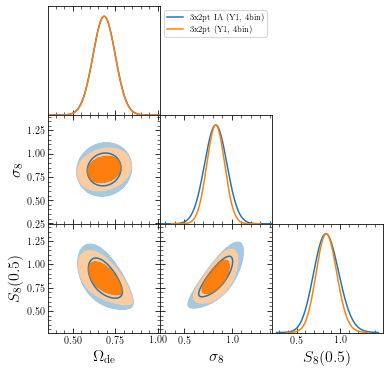

In [21]:
fishers = [fisher3x2pt_wIA, fisher3x2pt_woIA]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAquadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\Omega_\mathrm{de}$,$\sigma_8$,$S_8(0.5)$,$A_\mathrm{IA}$,$\eta_\mathrm{IA}$
"3x2pt IA (Y1, 4bin)",0.06558,0.11698,0.13992,0.98327,5092.43501
"3x2pt (Y1, 4bin)",0.06497,0.09334,0.11530,-1.00000,-1.00000


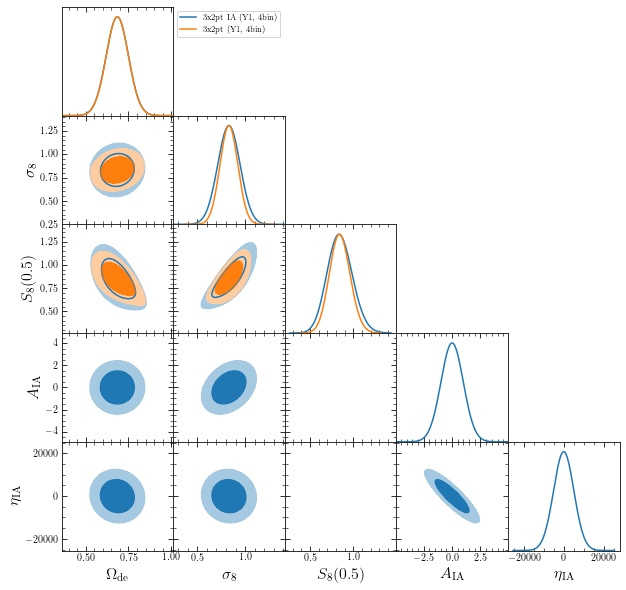

In [22]:
fishers = [fisher3x2pt_wIA, fisher3x2pt_woIA]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'A_IA', 'eta_IA'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAquadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['Omega_de', 'sigma8', 'S8', 'A_IA', 'eta_IA'])

### remove A_IA, eta_IA components from with-IA Fisher matrix.

In [23]:
F = fisher3x2pt_wIA.F[:-2, :].T[:-2,:].T
center = fisher3x2pt_wIA.center[:-2]
names = fisher3x2pt_wIA.names[:-2]
labels = fisher3x2pt_wIA.labels[:-2]
label = 'w/ IA removed IA'
fisher_wIA_rmIA = hsc3x2pt.Fisher_class(F, center, names, labels, label)

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt IA (Y1, 4bin)",0.11698,0.06558,0.13992
"3x2pt (Y1, 4bin)",0.09334,0.06497,0.11530
w/ IA removed IA,0.09331,0.06497,0.11526


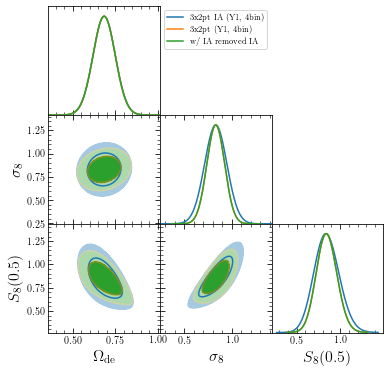

In [24]:
fishers = [fisher3x2pt_wIA, fisher3x2pt_woIA, fisher_wIA_rmIA]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAquadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

This result makee sense and nice consistency.

In [25]:
idx = [i for i,n in enumerate(fisher3x2pt_wIA.names) if (n in ['sigma8', 'A_IA', 'eta_IA']) ]
F = fisher3x2pt_wIA.F[np.ix_(idx, idx)]
center = fisher3x2pt_wIA.center[idx]
names = [fisher3x2pt_wIA.names[i] for i in idx]
labels = [fisher3x2pt_wIA.labels[i] for i in idx]
fisher_sigma8_AIA_etaIA = hsc3x2pt.Fisher_class(F, center, names, labels, label)

,$\sigma_8$,$A_\mathrm{IA}$,$\eta_\mathrm{IA}$
"3x2pt IA (Y1, 4bin)",0.11698,0.98327,5092.43501
w/ IA removed IA,0.00516,0.11805,909.31239


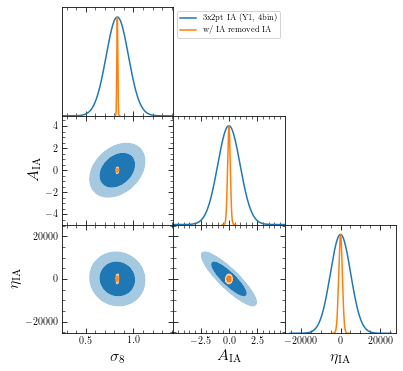

In [26]:
fishers = [fisher3x2pt_wIA, fisher_sigma8_AIA_etaIA]

fig = corner.plot_corner(fishers,
                         ['sigma8', 'A_IA', 'eta_IA'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAquadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'A_IA', 'eta_IA'])

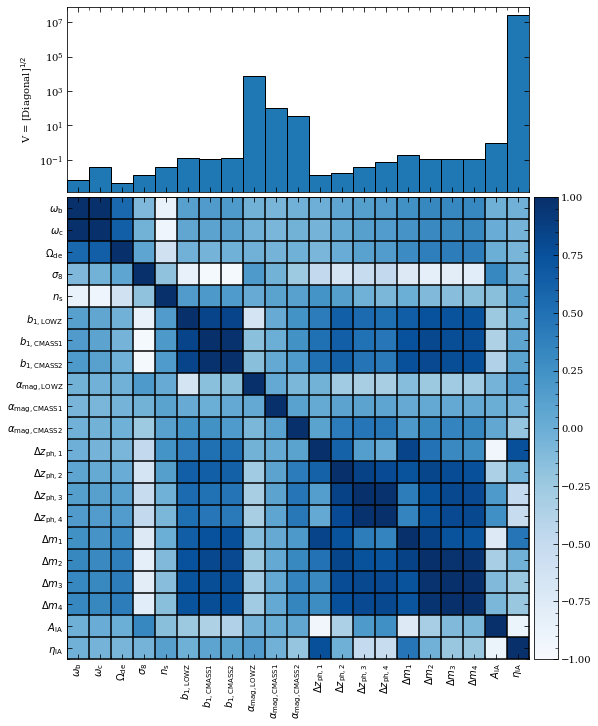

In [27]:
fig = fisher3x2pt_wIA.plot_correlation_coefficients(figsize=(12,12))

In [28]:
cc = fisher3x2pt_wIA.get_correlation_coefficients()

In [29]:
cc[3, -2]

0.3323988739350172

In [30]:
cc[2, -2]

-4.01352332352532e-06

## signal level comparison

In [31]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [32]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.load_Cl_cache('precomputed_Cl/quadruple_source_ClY1IA/fiducial/')
Cl_IA = pk2cl.Cl_cache['Cl']['s1,s1']
l_IA = pk2cl.Cl_cache['Cl']['l']

In [33]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.load_Cl_cache('precomputed_Cl/quadruple_source_ClY1/fiducial/')
Cl = pk2cl.Cl_cache['Cl']['s1,s1']
l = pk2cl.Cl_cache['Cl']['l']

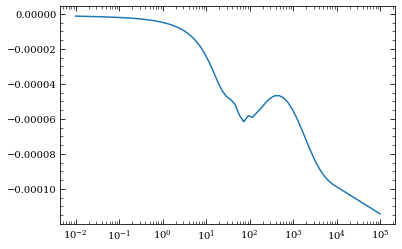

In [34]:
plt.figure()
plt.semilogx(l, Cl_IA/Cl-1)
plt.show()

In [35]:
pk2cl_IA = hsc3x2pt.pk2cl_class(power_b1)
pk2cl_IA.load_Cl_cache('precomputed_Cl/quadruple_source_ClY1IA/fiducial/')

In [36]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.load_Cl_cache('precomputed_Cl/quadruple_source_ClY1/fiducial/')

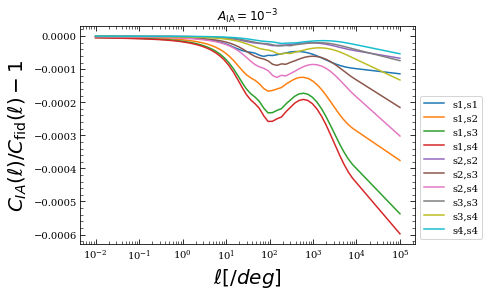

In [37]:
plt.figure()
plt.xlabel(r'$\ell [/deg]$', fontsize=20)
plt.ylabel(r'$C_{IA}(\ell)/C_{\rm fid}(\ell) - 1$',fontsize=20)
for s1 in range(1,5):
    for s2 in range(1,5):
        name = 's%d,s%d'%(s1,s2)
        if name in pk2cl.Cl_cache['Cl'].keys() and s1<=s2:
            #print(name)
            
            Cl_IA = pk2cl_IA.Cl_cache['Cl'][name]
            l_IA = pk2cl_IA.Cl_cache['Cl']['l']
            
            Cl = pk2cl.Cl_cache['Cl'][name]
            l = pk2cl.Cl_cache['Cl']['l']
            
            plt.semilogx(l, Cl_IA/Cl-1, label=name)
            
plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.title(r'$A_{\rm IA}=10^{-3}$')
plt.show()